In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

import utilities

plt.rcParams["figure.dpi"] = 200
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
LINE = 'MM15'
# BB16      22282
# BB61      21179
# BB62      22005
# MM15      23108
# TT7       15122

In [3]:
""" BUS_LINES = ['BB16', 'BB61', 'BB62', 'MM15']

df_list = []
for bus in BUS_LINES:
    file = f'/work/bde/Data/NYU-METS/Multivariate_Dataset/dataset/{LINE}/{LINE}.txt'

    df_list.append(pd.read_csv(file, names=['bandwidth', 'LTE-neighbors', 'RSSI', 'RSRQ', 'ENodeB-change', 'time-advance', 'speed', 'band']))

df = pd.concat(df_list)
df.info() """

" BUS_LINES = ['BB16', 'BB61', 'BB62', 'MM15']\n\ndf_list = []\nfor bus in BUS_LINES:\n    file = f'/work/bde/Data/NYU-METS/Multivariate_Dataset/dataset/{LINE}/{LINE}.txt'\n\n    df_list.append(pd.read_csv(file, names=['bandwidth', 'LTE-neighbors', 'RSSI', 'RSRQ', 'ENodeB-change', 'time-advance', 'speed', 'band']))\n\ndf = pd.concat(df_list)\ndf.info() "

In [4]:
file = f'./../../Data/NYU-METS/Multivariate_Dataset/dataset/{LINE}/{LINE}.txt'

df = pd.read_csv(file, names=['bandwidth', 'LTE-neighbors', 'RSSI', 'RSRQ', 'ENodeB-change', 'time-advance', 'speed', 'band'])
#df = pd.read_csv(file, header=None)
#df.isnull().values.any()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23108 entries, 0 to 23107
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bandwidth      23108 non-null  float64
 1   LTE-neighbors  23108 non-null  float64
 2   RSSI           23108 non-null  float64
 3   RSRQ           23108 non-null  float64
 4   ENodeB-change  23108 non-null  float64
 5   time-advance   23108 non-null  float64
 6   speed          23108 non-null  float64
 7   band           23108 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [5]:
# Calculate mean and standard deviation
mean_value = df['bandwidth'].mean()
std_value = df['bandwidth'].std()

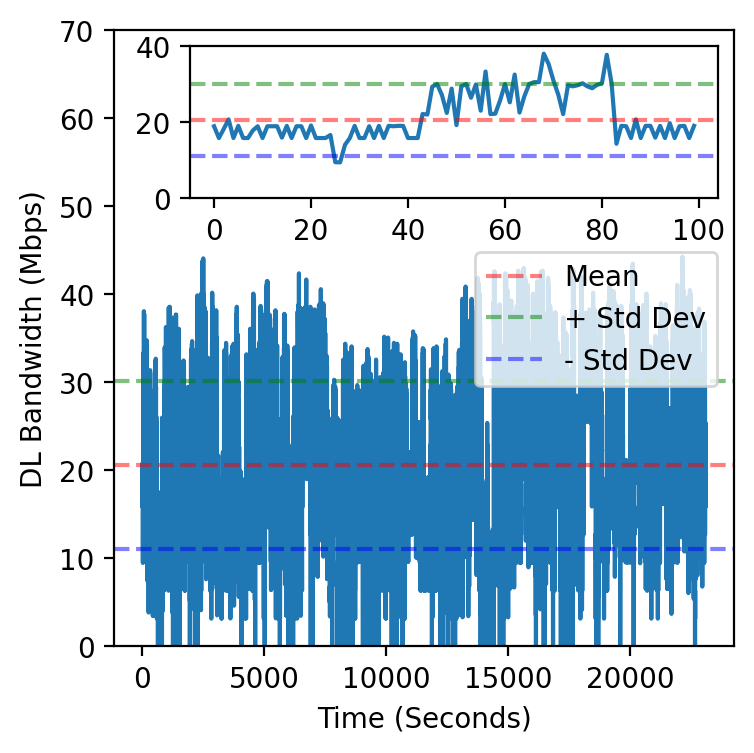

In [6]:
figure_size = (4, 4)
fig, ax1 = plt.subplots(figsize=figure_size, dpi=200)
ax1.set_xlabel('Time (Seconds)')
ax1.set_ylabel('DL Bandwidth (Mbps)')
#ax1.set_xlim(left=0.5, right=12.5)
ax1.set_ylim(bottom=0, top=70)

left, bottom, width, height = [0.22, 0.67, 0.66, 0.19]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_ylim(bottom=0, top=40)

#plt.plot(index, df_mae['Informer'], "-o", color="m", label="Informer")
ax1.plot(df['bandwidth'])
alpha_val = 0.5
# Plot mean and standard deviation lines on ax1
ax1.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax1.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax1.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')
# Add legend
ax1.legend(loc='lower left', bbox_to_anchor=(0.56, 0.4))

ax2.plot(df['bandwidth'][:100])# Plot mean and standard deviation lines on ax2
ax2.axhline(mean_value, color='r', linestyle='--', alpha=alpha_val, label='Mean')
ax2.axhline(mean_value + std_value, color='g', linestyle='--', alpha=alpha_val, label='+ Std Dev')
ax2.axhline(mean_value - std_value, color='b', linestyle='--', alpha=alpha_val, label='- Std Dev')
#df['bandwidth'].plot()
fig.savefig(f'plots/NYU-METS-data.pdf', bbox_inches='tight')

In [24]:
df['bandwidth'].describe()

count    23108.000000
mean        20.633769
std          9.526492
min          0.000000
25%         12.700000
50%         19.100000
75%         29.000000
max         44.300000
Name: bandwidth, dtype: float64

In [25]:
df.describe()

,bandwidth,LTE-neighbors,RSSI,RSRQ,ENodeB-change,time-advance,speed,band
count,23108.000000,23108.000000,23108.000000,23108.000000,23108.000000,23108.000000,23108.000000,23108.000000
mean,20.633769,7.567725,0.023758,76.641596,13.808768,0.691708,2.521656,2015.163580
std,9.526492,2.724691,0.152298,7.904403,2.649306,0.708520,2.999001,128.859541
min,0.000000,1.000000,0.000000,49.000000,6.000000,0.000000,0.000000,700.000000
25%,12.700000,6.000000,0.000000,71.000000,12.000000,0.000000,0.000000,1900.000000
50%,19.100000,7.000000,0.000000,76.000000,14.000000,1.000000,1.010000,2100.000000
75%,29.000000,9.000000,0.000000,81.000000,16.000000,1.000000,4.650000,2100.000000
max,44.300000,18.000000,1.000000,107.000000,20.000000,5.000000,15.350000,2100.000000


In [26]:
df['bandwidth'] = pd.to_numeric(df['bandwidth'])
df['LTE-neighbors'] = pd.to_numeric(df['LTE-neighbors'])
df['RSSI'] = pd.to_numeric(df['RSSI'])
df['RSRQ'] = pd.to_numeric(df['RSRQ'])
df['ENodeB-change'] = pd.to_numeric(df['ENodeB-change'])
df['time-advance'] = pd.to_numeric(df['time-advance'])
df['speed'] = pd.to_numeric(df['speed'])
df['band'] = pd.to_numeric(df['band'])

df = utilities.reduce_mem_usage_32(df)

df['date'] = pd.date_range(start='1/1/2023', periods=len(df), freq='S')
df.head()

df.info()
#df.info(show_counts=True)
#df.head()
#df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
#df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)

Memory usage of dataframe is 1.41 MB
Memory usage after optimization is: 0.71 MB
Decreased by 50.0%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23108 entries, 0 to 23107
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bandwidth      23108 non-null  float32       
 1   LTE-neighbors  23108 non-null  float32       
 2   RSSI           23108 non-null  float32       
 3   RSRQ           23108 non-null  float32       
 4   ENodeB-change  23108 non-null  float32       
 5   time-advance   23108 non-null  float32       
 6   speed          23108 non-null  float32       
 7   band           23108 non-null  float32       
 8   date           23108 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float32(8)
memory usage: 902.8 KB


/tmp/ipykernel_1975693/1338343974.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['date'] = pd.date_range(start='1/1/2023', periods=len(df), freq='S')


In [27]:
df.head()

,bandwidth,LTE-neighbors,RSSI,RSRQ,ENodeB-change,time-advance,speed,band,date
0,19.000000,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:00
1,15.900000,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:01
2,18.299999,5.0,0.0,67.0,14.0,1.0,0.0,1900.0,2023-01-01 00:00:02
3,20.799999,4.0,0.0,65.0,13.0,0.0,0.0,1900.0,2023-01-01 00:00:03
4,15.900000,4.0,0.0,65.0,13.0,0.0,0.0,1900.0,2023-01-01 00:00:04


In [28]:
df.to_csv(f'/work/bde/Data/NYU-preprocessed/{LINE}/{LINE}.csv', encoding='utf-8', index=False)
df.to_csv(f'data/NYU-METS/{LINE}.csv', encoding='utf-8', index=False)

#df.to_csv(f'/work/bde/Data/NYU-preprocessed/BUS_LINES.csv', encoding='utf-8', index=False)
#df.to_csv(f'data/NYU-METS/BUS_LINES.csv', encoding='utf-8', index=False)

OSError: Cannot save file into a non-existent directory: '/work/bde/Data/NYU-preprocessed/MM15'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def multi_corr(feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

    return corr1, corr2, corr3

In [ ]:
corr1, corr2, corr3 = multi_corr('bandwidth')

In [ ]:
corr1['corr1'] = corr1
corr1['corr2'] = corr2
corr1['corr3'] = corr3

corr_df = corr1[['corr1', 'corr2', 'corr3']]
corr_df['average'] = corr_df.mean(axis=1)
corr_df

In [ ]:
len(df) * 0.2
scope = 4621

In [ ]:
df.tail(scope)['bandwidth'].head()

In [ ]:
#bandwidth_tail = df.tail(scope*2).head(scope)['bandwidth'].to_numpy()
tail = df.tail(scope)
type(tail)

In [ ]:
tail = tail[['bandwidth']]
type(tail)

In [ ]:
tail.head()

In [ ]:
""" test_data = np.arange(50)
tail = pd.DataFrame({'bandwidth': test_data})
tail.head() """

In [ ]:
span = 8
pred_len = 48

truth = []
ewma8 = []
shifted = []

tail['EWMA8'] = tail['bandwidth'].ewm(span=span, min_periods=8, adjust=True).mean()

b_truth  = tail['bandwidth'].to_numpy()
b_ewma8 = tail['EWMA8'].to_numpy()

tail.head(30)

In [ ]:
#b_truth[(span):(span+pred_len)]

In [ ]:
#b_ewma8[0+span-1]

In [ ]:
#b_truth[0+span-1]

In [ ]:
for i in range(len(b_truth) - span - pred_len):
    truth.append(b_truth[(i+span):(i+span+pred_len)])
    ewma8.append(np.repeat(b_ewma8[i+span-1], pred_len)) #correct?
    #ewma8.append(np.repeat(b_ewma8[i+span-0], pred_len)) #informer
    shifted.append(np.repeat(b_truth[i+span-1], pred_len))

#EWMA
rmse = mean_squared_error(truth, ewma8, squared=False)
mae = mean_absolute_error(truth, ewma8)
print(f'EWMA8 rmse: {rmse}, mae: {mae}')

#Shifted
rmse = mean_squared_error(truth, shifted, squared=False)
mae = mean_absolute_error(truth, shifted)
print(f'Shifted rmse: {rmse}, mae: {mae}')